<a href="https://colab.research.google.com/github/twishi03/Data/blob/main/Xenium_Squidpy_Lung_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install squidpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.8/145.8 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.3/110.3 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq

/usr/local/lib/python3.10/dist-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.3-CAPI-1.17.3) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/spatialdata/__init__.py:11: UserWarning: Geopandas was set to use PyGEOS, changing to shapely 2.0 with:

	geopandas.options.use_pygeos = True

If you intended to use PyGEOS, set the option to False.
  _check_geopandas_using_shapely()


In [2]:
adata = sc.read_10x_h5(
    filename="/content/cell_feature_matrix.h5"
)

In [3]:
df = pd.read_csv(
    "/content/cells.csv"
)

In [4]:
df.set_index(adata.obs_names, inplace=True)
adata.obs = df.copy()

In [5]:
adata.obsm["spatial"] = adata.obs[["x_centroid", "y_centroid"]].copy().to_numpy()

In [6]:
adata.obs

,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,control_codeword_counts,unassigned_codeword_counts,deprecated_codeword_counts,total_counts,cell_area,nucleus_area
aaaadpbp-1,aaaadpbp-1,206.089813,1495.898193,0,0,0,0,0,0,68.456877,NaN
aaaaficg-1,aaaaficg-1,201.765823,1816.210815,19,0,0,0,0,19,49.130002,21.268595
aaabbaka-1,aaabbaka-1,179.024506,2167.253906,53,0,0,0,0,53,119.618911,74.778753
aaabbjoo-1,aaabbjoo-1,186.060654,2163.309082,29,0,0,0,0,29,94.241097,59.109533
aaablchg-1,aaablchg-1,200.246887,2198.593506,42,0,0,1,0,43,120.341411,52.426408
...,...,...,...,...,...,...,...,...,...,...,...
ojaaphhh-1,ojaaphhh-1,4552.125977,1643.896484,3,0,0,0,0,3,26.913126,11.153594
ojabeldf-1,ojabeldf-1,4437.434082,1629.141846,6,0,0,0,0,6,5.418750,5.418750
ojacfbid-1,ojacfbid-1,4463.312988,1576.604004,0,0,0,0,0,0,6.502500,6.502500
ojacfhhg-1,ojacfhhg-1,4619.915527,1454.322388,2,0,0,0,0,2,7.089532,7.089532


In [7]:
sc.pp.calculate_qc_metrics(adata, percent_top=(10, 20, 50, 150), inplace=True)

In [8]:
cprobes = (
    adata.obs["control_probe_counts"].sum() / adata.obs["total_counts"].sum() * 100
)
cwords = (
    adata.obs["control_codeword_counts"].sum() / adata.obs["total_counts"].sum() * 100
)
print(f"Negative DNA probe count % : {cprobes}")
print(f"Negative decoding count % : {cwords}")

Negative DNA probe count % : 0.0042798755460108405
Negative decoding count % : 0.0018622359246001363


<Axes: title={'center': 'Nucleus ratio'}, ylabel='Count'>

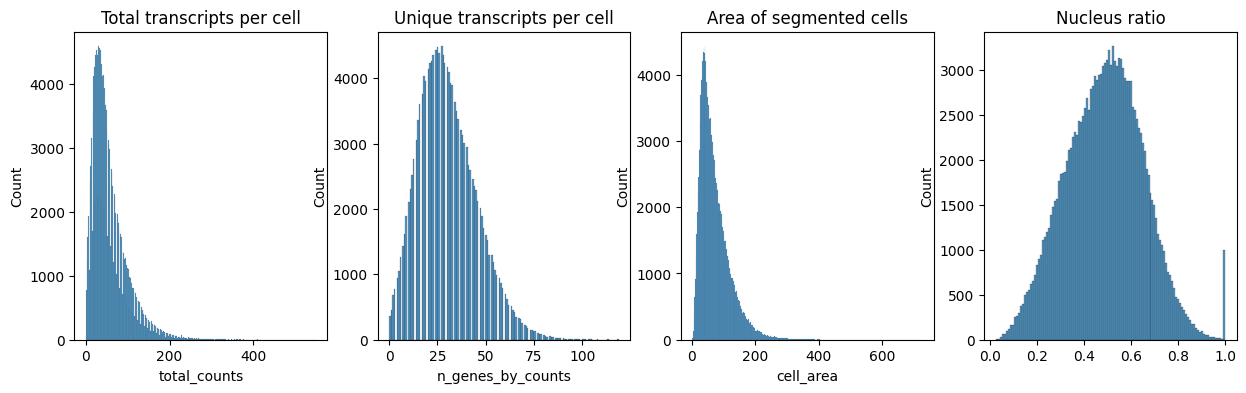

In [9]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))

axs[0].set_title("Total transcripts per cell")
sns.histplot(
    adata.obs["total_counts"],
    kde=False,
    ax=axs[0],
)

axs[1].set_title("Unique transcripts per cell")
sns.histplot(
    adata.obs["n_genes_by_counts"],
    kde=False,
    ax=axs[1],
)


axs[2].set_title("Area of segmented cells")
sns.histplot(
    adata.obs["cell_area"],
    kde=False,
    ax=axs[2],
)

axs[3].set_title("Nucleus ratio")
sns.histplot(
    adata.obs["nucleus_area"] / adata.obs["cell_area"],
    kde=False,
    ax=axs[3],
)

In [10]:
sc.pp.filter_cells(adata, min_counts=10)
sc.pp.filter_genes(adata, min_cells=5)

In [11]:
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


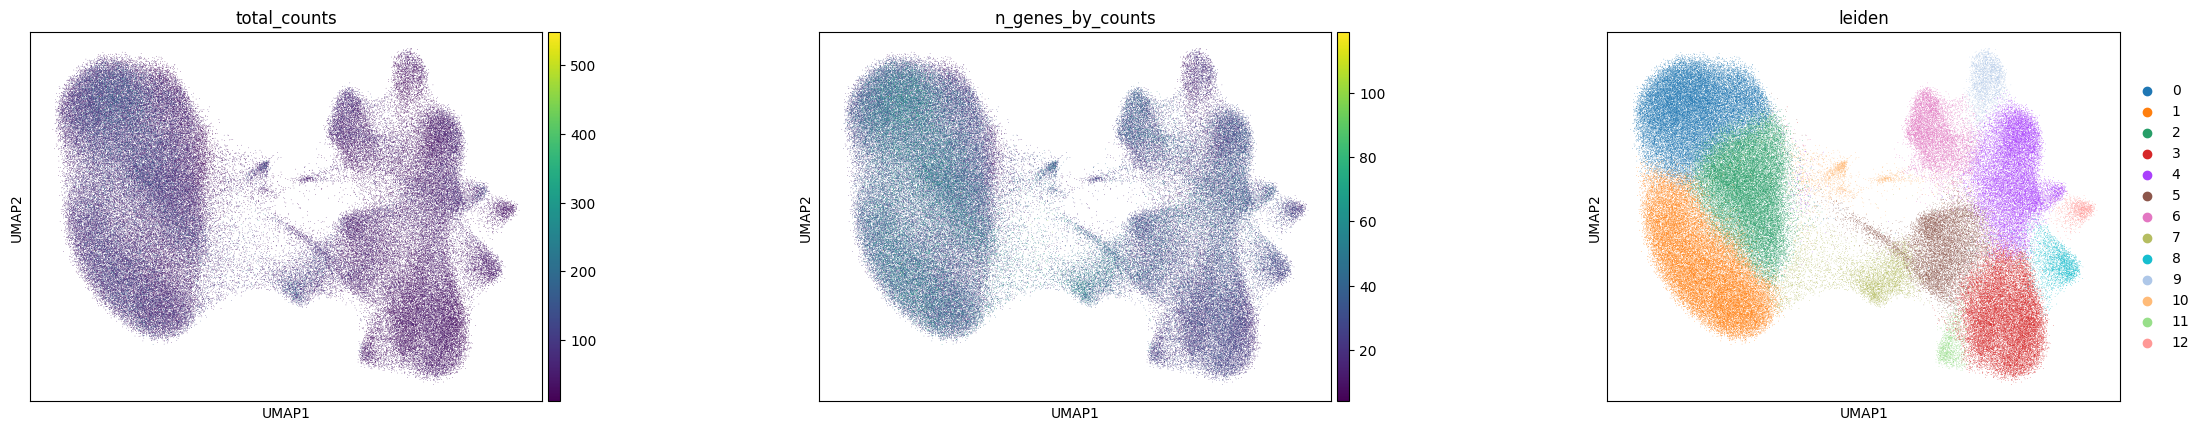

In [12]:
sc.pl.umap(
    adata,
    color=[
        "total_counts",
        "n_genes_by_counts",
        "leiden",
    ],
    wspace=0.4,
)

/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


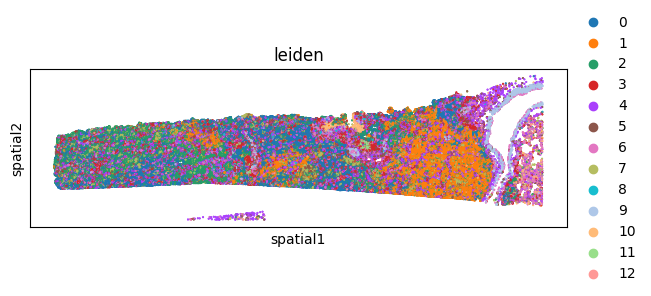

In [13]:
sq.pl.spatial_scatter(
    adata,
    library_id="spatial",
    shape=None,
    color=[
        "leiden",
    ],
    wspace=0.4,
)

In [14]:
sq.gr.spatial_neighbors(adata, coord_type="generic", delaunay=True)

In [15]:
sq.gr.centrality_scores(adata, cluster_key="leiden")

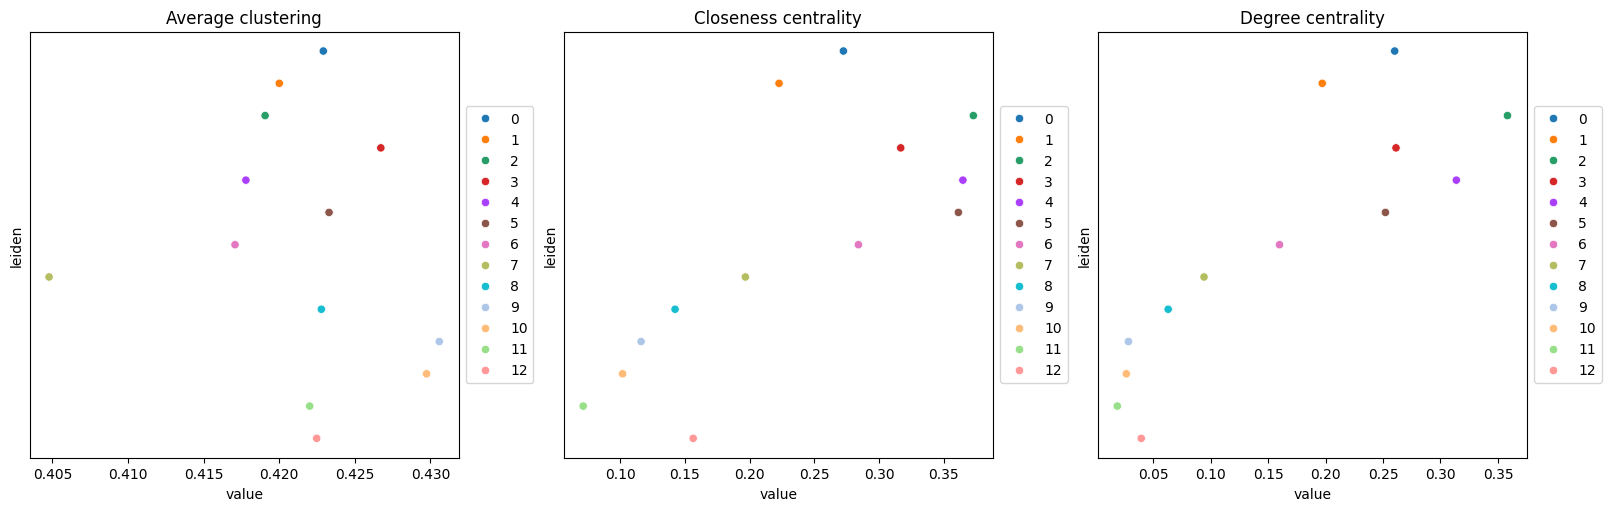

In [16]:
sq.pl.centrality_scores(adata, cluster_key="leiden", figsize=(16, 5))

In [17]:
adata_subsample = sc.pp.subsample(adata, fraction=0.5, copy=True)

  0%|          | 0/741 [00:00<?, ?/s]

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


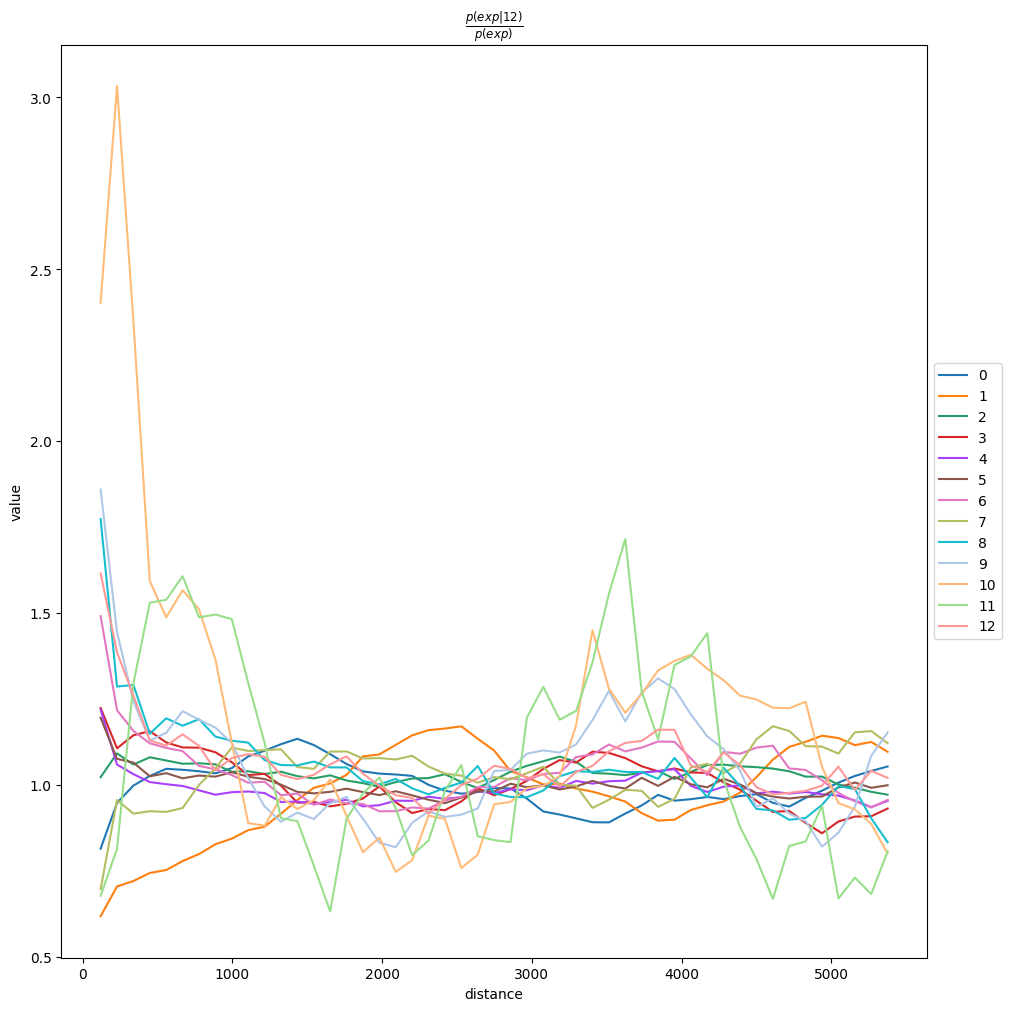

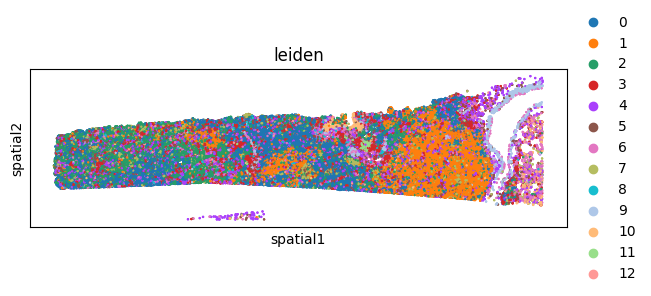

In [18]:
sq.gr.co_occurrence(
    adata_subsample,
    cluster_key="leiden",
)
sq.pl.co_occurrence(
    adata_subsample,
    cluster_key="leiden",
    clusters="12",
    figsize=(10, 10),
)
sq.pl.spatial_scatter(
    adata_subsample,
    color="leiden",
    shape=None,
    size=2,
)

In [21]:
sq.gr.nhood_enrichment(adata, cluster_key="leiden")

  0%|          | 0/1000 [00:00<?, ?/s]

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/squidpy/pl/_utils.py:557: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row_labels = adata.obs[key][row_order]
/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'.

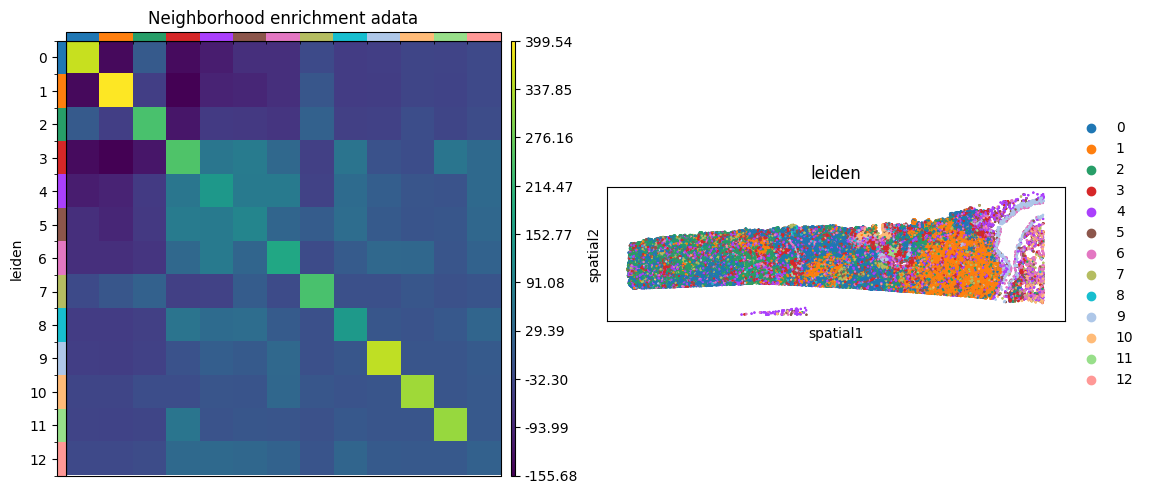

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(13, 7))
sq.pl.nhood_enrichment(
    adata,
    cluster_key="leiden",
    figsize=(8, 8),
    title="Neighborhood enrichment adata",
    ax=ax[0],
)
sq.pl.spatial_scatter(adata_subsample, color="leiden", shape=None, size=2, ax=ax[1])

In [23]:
sq.gr.spatial_neighbors(adata_subsample, coord_type="generic", delaunay=True)
sq.gr.spatial_autocorr(
    adata_subsample,
    mode="moran",
    n_perms=100,
    n_jobs=1,
)
adata_subsample.uns["moranI"].head(10)

  0%|          | 0/100 [00:00<?, ?/s]

,I,pval_norm,var_norm,pval_z_sim,pval_sim,var_sim,pval_norm_fdr_bh,pval_z_sim_fdr_bh,pval_sim_fdr_bh
C20orf85,0.580415,0.0,0.000004,0.0,0.009901,0.000007,0.0,0.0,0.011415
CYP2B6,0.559513,0.0,0.000004,0.0,0.009901,0.000008,0.0,0.0,0.011415
MALL,0.495123,0.0,0.000004,0.0,0.009901,0.000007,0.0,0.0,0.011415
C1orf194,0.485502,0.0,0.000004,0.0,0.009901,0.000007,0.0,0.0,0.011415
MS4A1,0.474634,0.0,0.000004,0.0,0.009901,0.000006,0.0,0.0,0.011415
MYC,0.469961,0.0,0.000004,0.0,0.009901,0.000007,0.0,0.0,0.011415
EPCAM,0.429761,0.0,0.000004,0.0,0.009901,0.000007,0.0,0.0,0.011415
CAPN8,0.419282,0.0,0.000004,0.0,0.009901,0.000005,0.0,0.0,0.011415
TCIM,0.390758,0.0,0.000004,0.0,0.009901,0.000005,0.0,0.0,0.011415
MYH11,0.385297,0.0,0.000004,0.0,0.009901,0.000005,0.0,0.0,0.011415


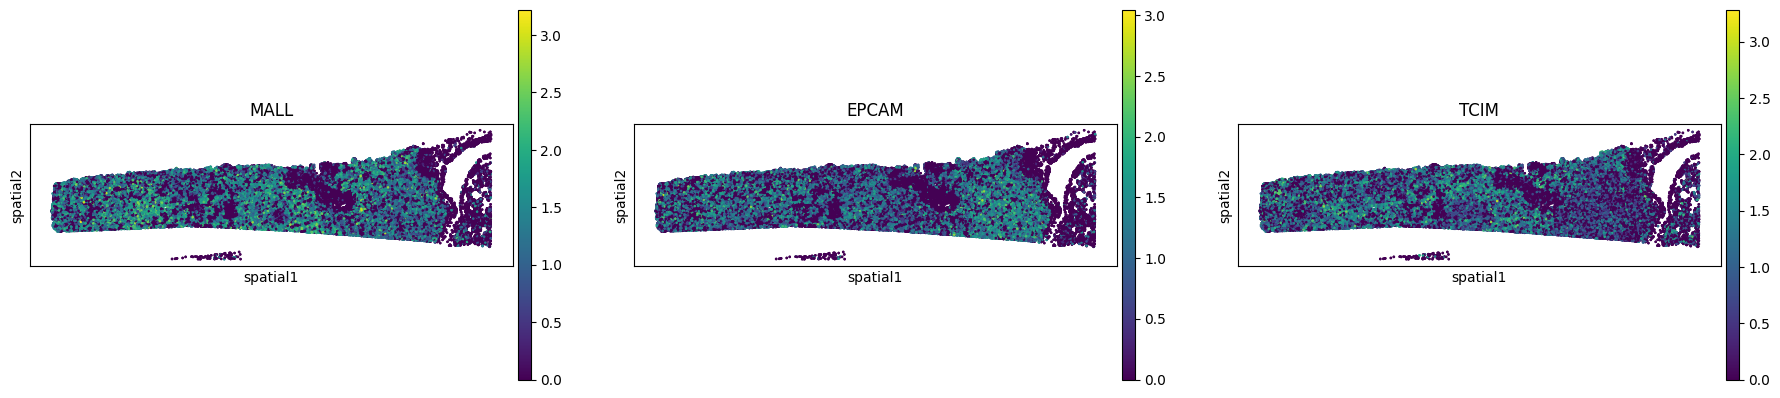

In [26]:
sq.pl.spatial_scatter(
    adata_subsample,
    library_id="spatial",
    color=[
        "MALL",
        "EPCAM","TCIM"
    ],
    shape=None,
    size=3,
    img=False,
)